## Purpose of script:
#### tutorial on ARIMA and SARIMA (Seasonal ARIMA)
#### code referenced from:
#### https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

#### Notes on ARIMA:
#### An ARIMA model is characterized by 3 terms: p, d, q
#### p is the order of the AR term
#### q is the order of the MA term
#### d is the number of differencing required to make the time series stationary
#### If a time series has seasonal patterns, it is required to add seasonal terms and it becomes SARIMA

#### The first step to build an ARIMA model is to make the time series stationary
#### ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.
#### Auto Regressive (AR only) model is one where Yt depends only on its own lags. That is, Yt is a function of the ‘lags of Yt’.
#### Moving Average (MA only) model is one where Yt depends only on the lagged forecast errors.

In [9]:
import numpy as np, pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
register_matplotlib_converters()

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv',
                 names=['value'], header=0)
print(df.shape)
df.head(2)

(100, 1)


,value
0,88
1,84


In [11]:
## run Augmented Dickey Fuller test to see if the series is stationary or not
## ARIMA performs on stationary data
## Since P-value is greater than the significance level, data is not stationary
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.464240
p-value: 0.124419


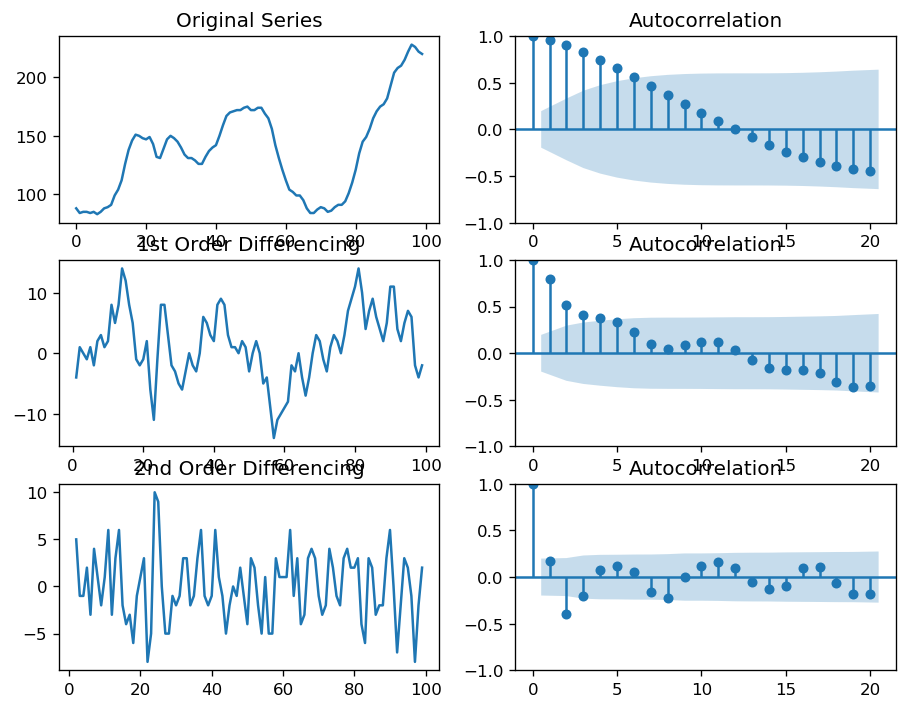

In [15]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()